In [1]:
# run experiments for different values of alpha on source and target distributions

In [2]:
import subprocess

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Source only change

In [3]:
source_alpha = np.arange(0.01, 1, 0.01)

delta = 1e-5
m_updates = 3

result = {'naive' : None, 'bbse' : None, 'malls' : None, 'masiw' : None}
shifts = []


for alpha in tqdm(source_alpha):
    for alg in result.keys():
        cmd = f'python3 masiw.py -source_alpha={alpha} -keep_source=0 -delta={delta} -alg={alg} -meta_updates={m_updates}'
        val = float(str(subprocess.check_output(cmd, shell=True)).splitlines()[0][2:-3])
        result[alg] = val
    shifts.append(list(result.values()))

shifts = np.array(shifts)

100%|██████████| 99/99 [34:29<00:00, 20.90s/it]


In [4]:
df = pd.DataFrame(shifts, columns=list(result.keys()), index=source_alpha)
df.head(10)

,naive,bbse,malls,masiw
0.01,0.366667,0.294444,0.494444,0.511111
0.02,0.366667,0.294444,0.494444,0.511111
0.03,0.491667,0.505556,0.611111,0.605556
0.04,0.544444,0.469444,0.497222,0.550000
0.05,0.586111,0.405556,0.536111,0.588889
0.06,0.502778,0.511111,0.572222,0.588889
0.07,0.577778,0.286111,0.530556,0.597222
0.08,0.633333,0.416667,0.611111,0.633333
0.09,0.605556,0.341667,0.583333,0.605556
0.10,0.683333,0.550000,0.680556,0.680556


In [132]:
rolling_df = df.iloc[:30,:].rolling(5).mean()
# del rolling_df['bbse']
# del rolling_df['malls']

<AxesSubplot:title={'center':'Source based Label Shift on MNIST'}, xlabel='alpha', ylabel='test accuracy'>

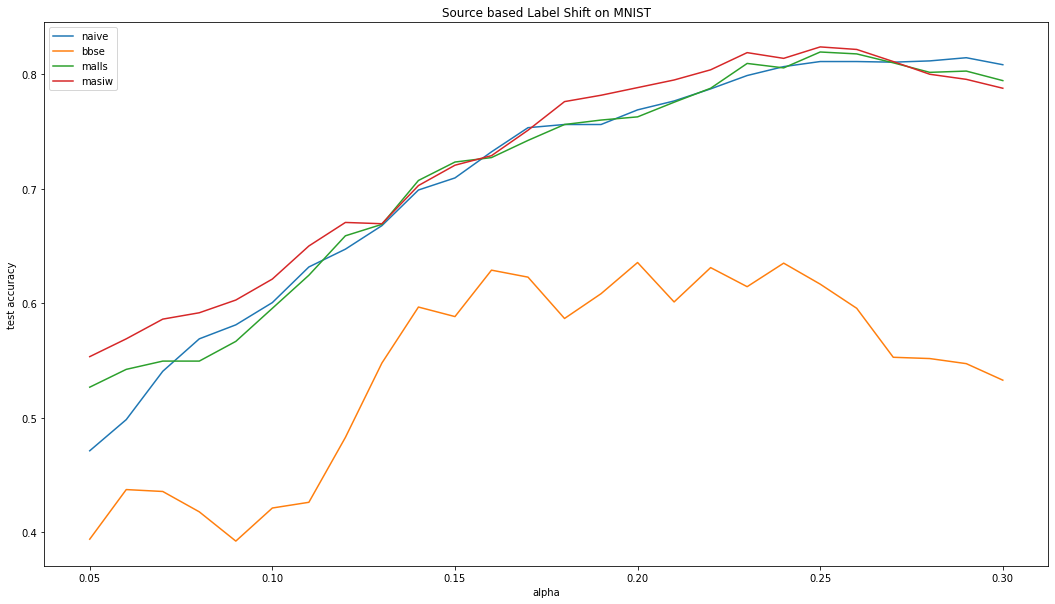

In [139]:
rolling_df.plot(
    figsize=(18,10), xlabel='alpha', ylabel='test accuracy' ,title="Source based Label Shift on MNIST")

### Target only change

In [140]:
target_alpha = np.arange(0.01, 1, 0.01)

delta = 1e-5
m_updates = 2

result = {'naive' : None, 'bbse' : None, 'malls' : None, 'masiw' : None}
shifts = []


for alpha in tqdm(source_alpha):
    for alg in result.keys():
        cmd = f'python3 masiw.py -target_alpha={alpha} -keep_target=0 -delta={delta} -alg={alg} -meta_updates={m_updates}'
        val = float(str(subprocess.check_output(cmd, shell=True)).splitlines()[0][2:-3])
        result[alg] = val
    shifts.append(list(result.values()))

shifts = np.array(shifts)

100%|██████████| 99/99 [36:29<00:00, 22.12s/it]


In [141]:
df = pd.DataFrame(shifts, columns=list(result.keys()), index=source_alpha)
df.head(10)

,naive,bbse,malls,masiw
0.01,0.981818,0.963636,0.945455,0.872727
0.02,0.981818,0.963636,0.945455,0.872727
0.03,0.982143,0.928571,0.946429,0.875000
0.04,0.968254,0.968254,0.904762,0.888889
0.05,0.944444,0.958333,0.916667,0.930556
0.06,0.964706,0.952941,0.952941,0.988235
0.07,0.947368,0.957895,0.926316,0.947368
0.08,0.944444,0.981481,0.972222,0.981481
0.09,0.955357,0.964286,0.928571,0.937500
0.10,0.957983,0.957983,0.932773,0.924370


In [142]:
rolling_df = df.rolling(10).mean()
# del rolling_df['bbse']
# del rolling_df['malls']

<AxesSubplot:title={'center':'Target based Label Shift on MNIST'}, xlabel='alpha', ylabel='test accuracy'>

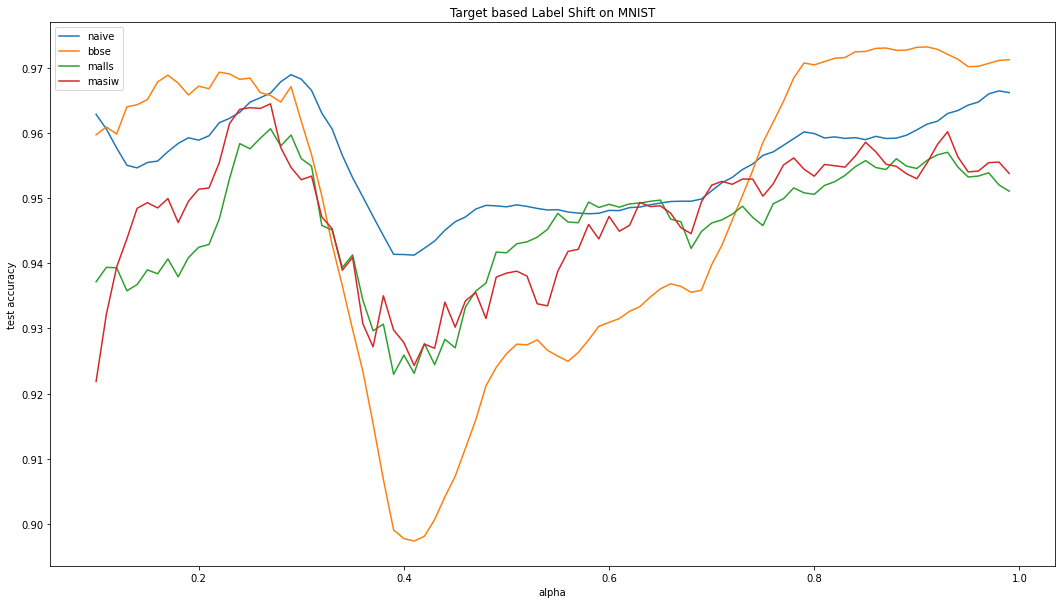

In [144]:
rolling_df.plot(
    figsize=(18,10), xlabel='alpha', ylabel='test accuracy' ,title="Target based Label Shift on MNIST")

### Source and Target change

In [146]:
dist_alpha = np.arange(0.01, 1, 0.01)

delta = 1e-5
m_updates = 2

result = {'naive' : None, 'bbse' : None, 'malls' : None, 'masiw' : None}
shifts = []


for alpha in tqdm(dist_alpha):
    for alg in result.keys():
        cmd = f'python3 masiw.py -source_alpha={alpha} -keep_source=0 -target_alpha={alpha} -keep_target=0 -delta={delta} -alg={alg} -meta_updates={m_updates}'
        val = float(str(subprocess.check_output(cmd, shell=True)).splitlines()[0][2:-3])
        result[alg] = val
    shifts.append(list(result.values()))

shifts = np.array(shifts)

100%|██████████| 99/99 [33:12<00:00, 20.12s/it]


In [180]:
df = pd.DataFrame(shifts, columns=list(result.keys()), index=source_alpha)
df.head(10)

,naive,bbse,malls,masiw
0.01,0.441860,0.395349,0.790698,0.790698
0.02,0.431818,0.386364,0.750000,0.772727
0.03,0.500000,0.153846,0.673077,0.692308
0.04,0.224490,0.142857,0.102041,0.122449
0.05,0.200000,0.327273,0.236364,0.218182
0.06,0.311688,0.558442,0.688312,0.714286
0.07,0.421053,0.456140,0.298246,0.298246
0.08,0.581395,0.162791,0.697674,0.709302
0.09,0.463415,0.646341,0.487805,0.524390
0.10,0.595420,0.511450,0.580153,0.564885


<AxesSubplot:title={'center':'Source + Target based Label Shift on MNIST'}, xlabel='alpha', ylabel='test accuracy'>

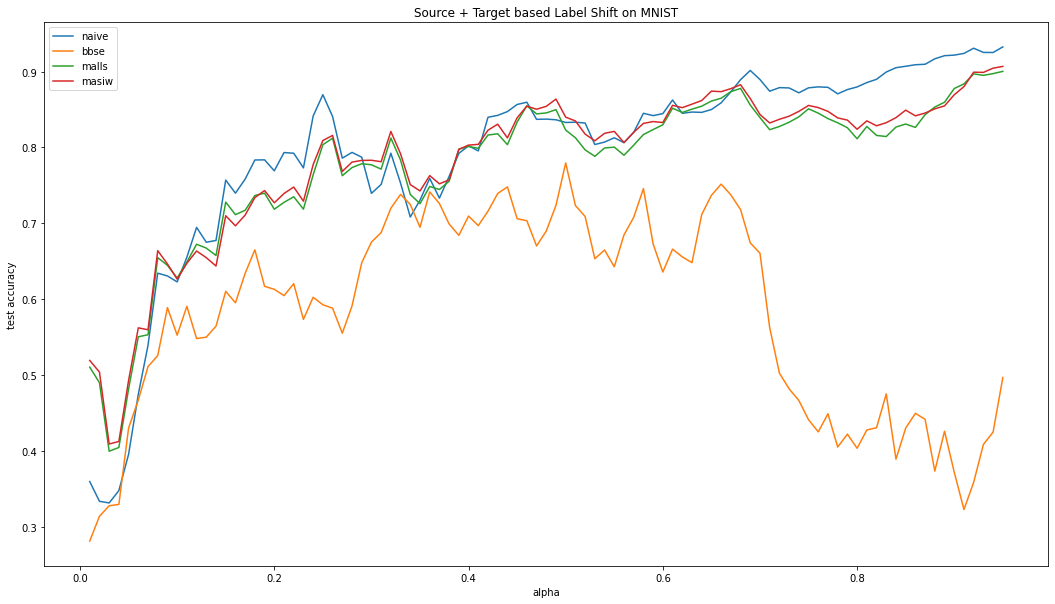

In [200]:
rolling_df = df[::-1].rolling(5).mean()
# del rolling_df['bbse']
# del rolling_df['malls']

rolling_df.plot(
    figsize=(18,10), xlabel='alpha', ylabel='test accuracy' ,title="Source + Target based Label Shift on MNIST")